<div class="alert alert-success">
    <h1 align="center">Mobile Price Analytics (Prediction & EDA) </h1>
    <h3 align="center">Seyed Ali Abolfazli </a></h3>
</div>

# 1. Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, log_loss, classification_report

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 2. Load Training Data

In [8]:
train_data = pd.read_csv('train.csv')
print(train_data.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [10]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
# Check for missing values
missing_values = train_data.isnull().sum()
print("Missing Values in each column:\n", missing_values)


Missing Values in each column:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# 3. Data Visualization 

In [18]:
# Define list of features (excluding target)
all_features = list(train_data.columns)
all_features.remove('price_range')

In [20]:
# Identify binary features (for Count Plot)
# Assuming binary features: blue, dual_sim, four_g, three_g, touch_screen, wifi
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Numeric features (the rest)
numeric_features = [feat for feat in all_features if feat not in binary_features]

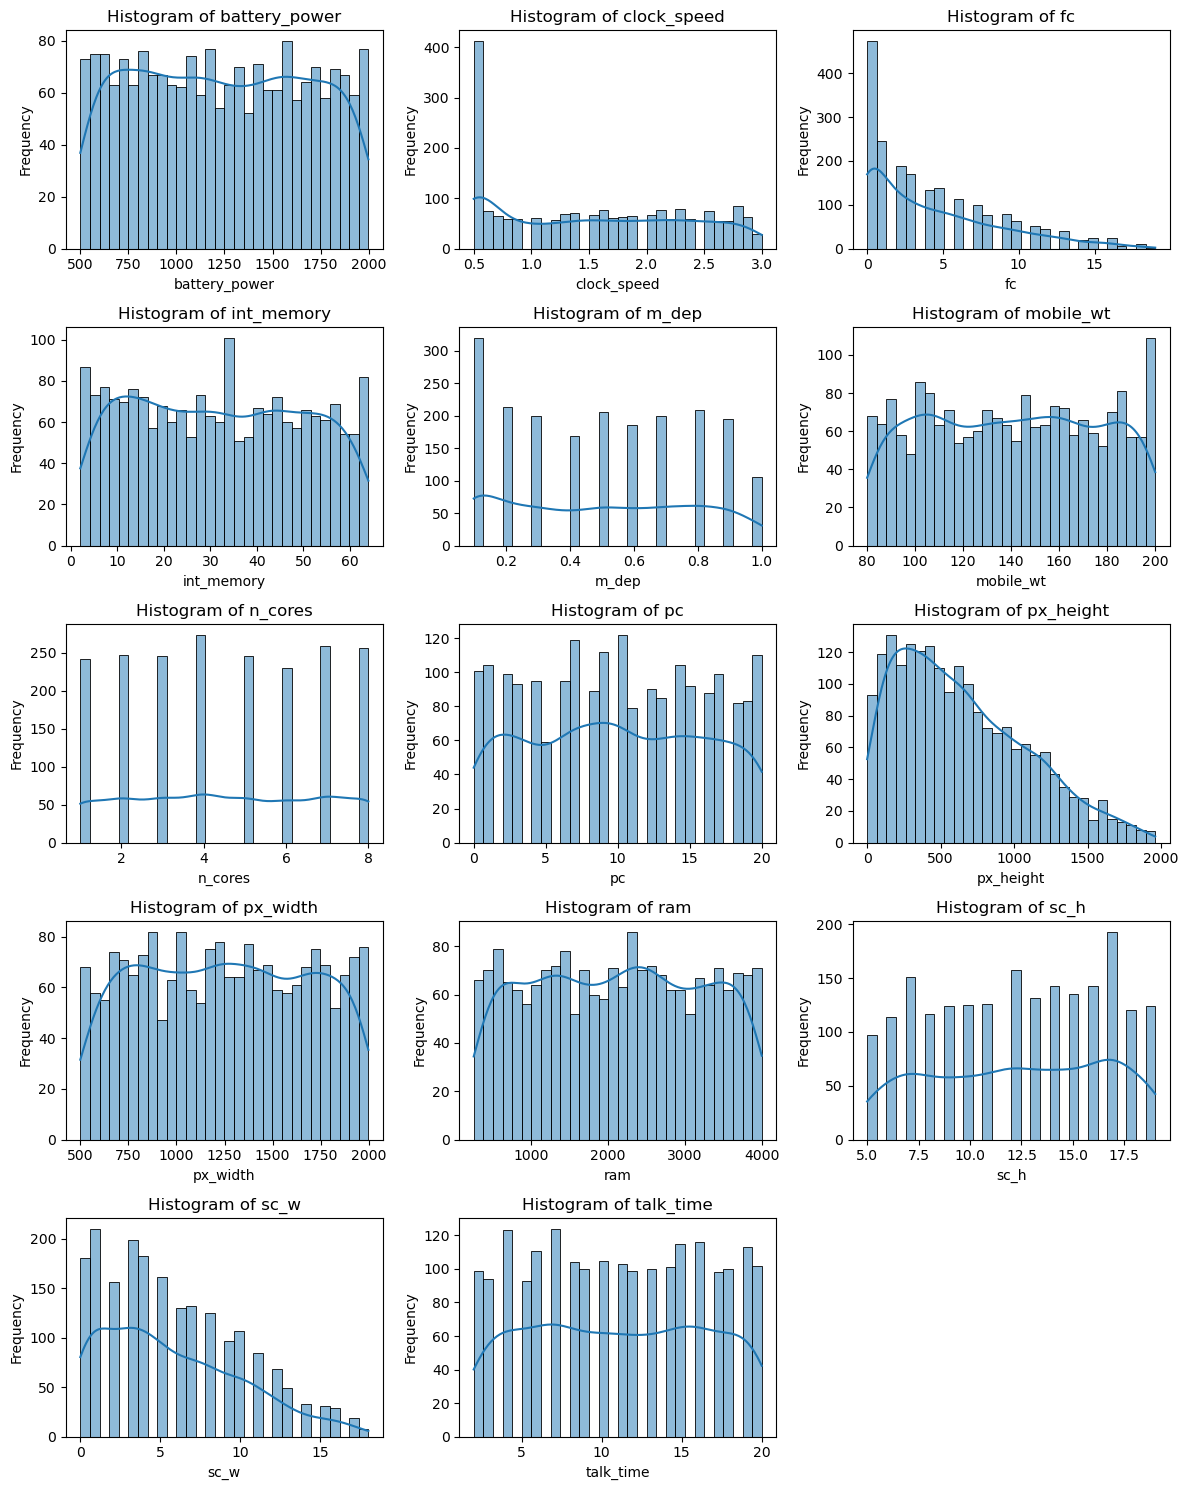

In [22]:
# a. Histogram for Numeric Features
n_numeric = len(numeric_features)
ncols = 3
nrows = math.ceil(n_numeric / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    sns.histplot(train_data[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Exploratory Data Analysis Insights

Based on the provided histograms, here are some key observations:

1.  **Battery Power:** The distribution appears relatively uniform, suggesting a diverse range of battery capacities among the devices in the dataset. There isn't a clear concentration around a specific battery power level.

2.  **Clock Speed:** The distribution is skewed towards lower values. A large number of devices have clock speeds in the lower end of the spectrum.

3.  **Front Camera (fc):** This is right-skewed, implying that many devices have lower front camera resolutions, with fewer devices having high-resolution front cameras.

4.  **Mobile Weight:** The distribution is approximately normal, centered indicating most devices have a mobile weight centered around a certain value.

5.  **Internal Memory (int_memory):** The distribution appears uniform, implying no clear patterns and variety of internal memory.

6.  **Number of Cores (n_cores):** The distribution seems uniform, suggesting roughly equal representation of devices with varying numbers of cores.

7.  **Pixel Height (px_height):** The distribution is right-skewed, suggesting many devices have lower pixel heights.

8.  **Pixel Width (px_width):** The distribution is also right-skewed, with many devices having smaller pixel widths.

9.  **RAM:** Uniformly distributed indicating a diverse dataset with different RAM capacities.

10. **Screen Height (sc_h):**  Distribution is mostly uniform



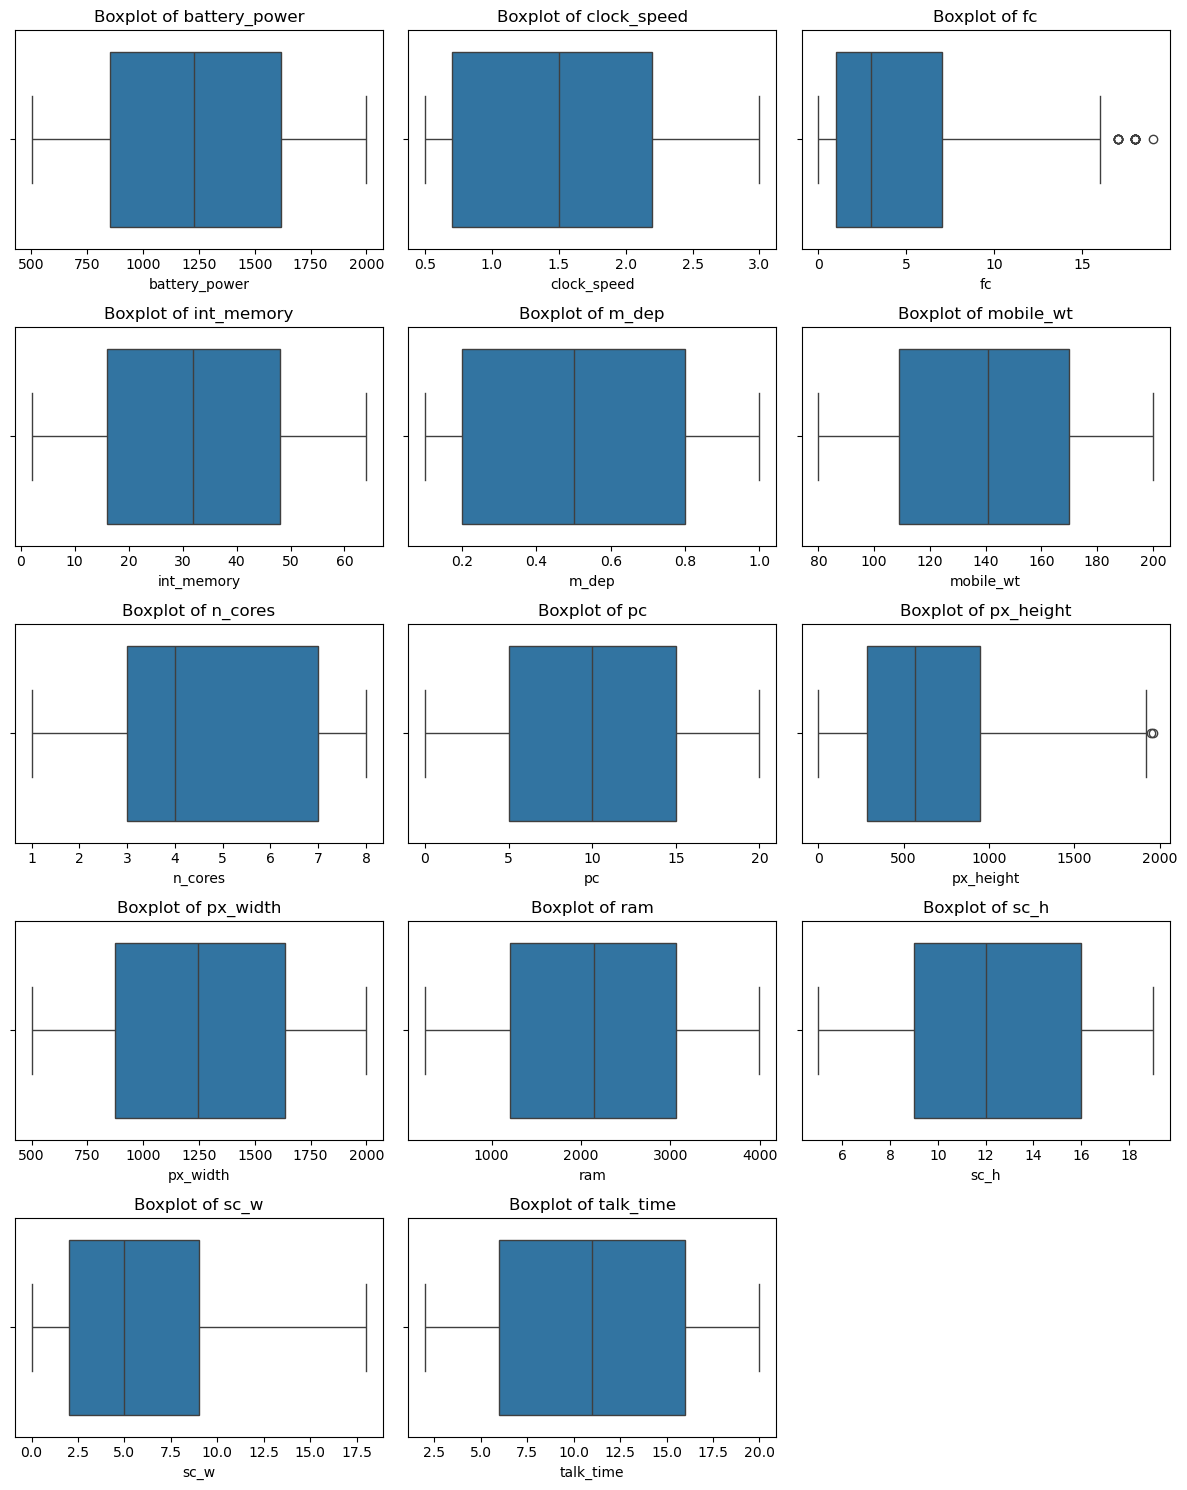

In [25]:
# b. Boxplot for Numeric Features (to detect outliers)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    sns.boxplot(x=train_data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Exploratory Data Analysis Insights (Boxplot Analysis) 

Based on the provided boxplots, here are some key observations:

1.  **Front Camera (fc):** Significant high outliers suggest some phones heavily prioritize front camera resolution, potentially targeting a specific market segment (e.g., selfie enthusiasts).  This warrants further investigation to see if `fc` correlates with other premium features or price.

2.  **Pixel Dimensions (px_height, px_width):** There are few outliers. It suggests, the resolution does not vary that much for the devices.

3.  **RAM:** The median RAM looks centered within the box, implying a fairly symmetrical distribution around the median. The data suggests that most devices have RAM in the range of 1500 to 3000.

4.  **Battery Power:** It looks like the Battery Power data is almost normally distributed. The data suggests that most devices have a Battery Power in the range of 700 to 1600.

5.  **Internal Memory:** The internal memory has a nearly normal distribution and there are no outliers. The data suggests that most devices have internal memory in the range of 10 to 50.

6.  **Clock Speed:** The Clock Speed data are almost normally distributed with no outliers. The data suggests that most devices have a Clock Speed in the range of 0.7 to 2.5.

7.  **Number of cores:** The Number of Cores looks almost uniformly distributed. The data suggests that most devices have a Number of Cores in the range of 2 to 7.

8. **Talk Time:** The talk time has a nearly normal distribution and there are no outliers.

9. **Screen Height:** The Screen Height has a nearly normal distribution and there are no outliers.

10. **Primary Camera Pixel (pc):** The Primary Camera Pixel (pc) has a nearly normal distribution and there are no outliers.


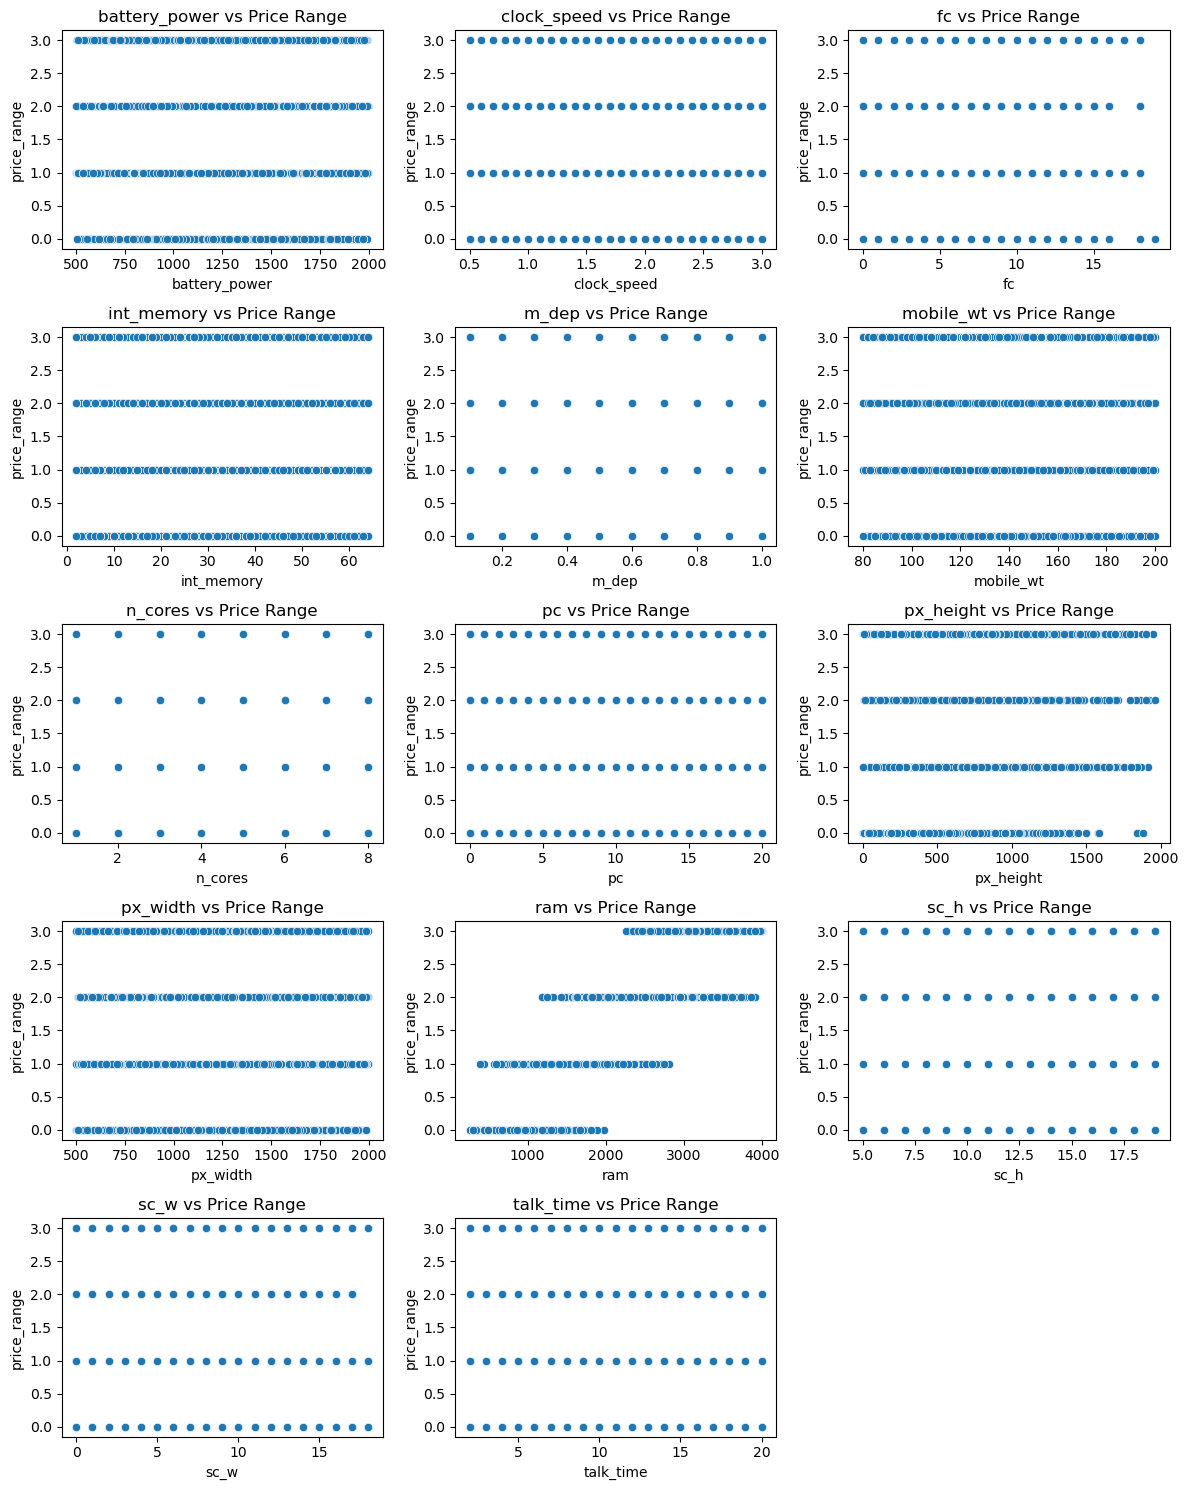

In [29]:
# c. Scatter Plot of Each Numeric Feature vs price_range
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    sns.scatterplot(x=train_data[feature], y=train_data['price_range'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Price Range')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('price_range')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

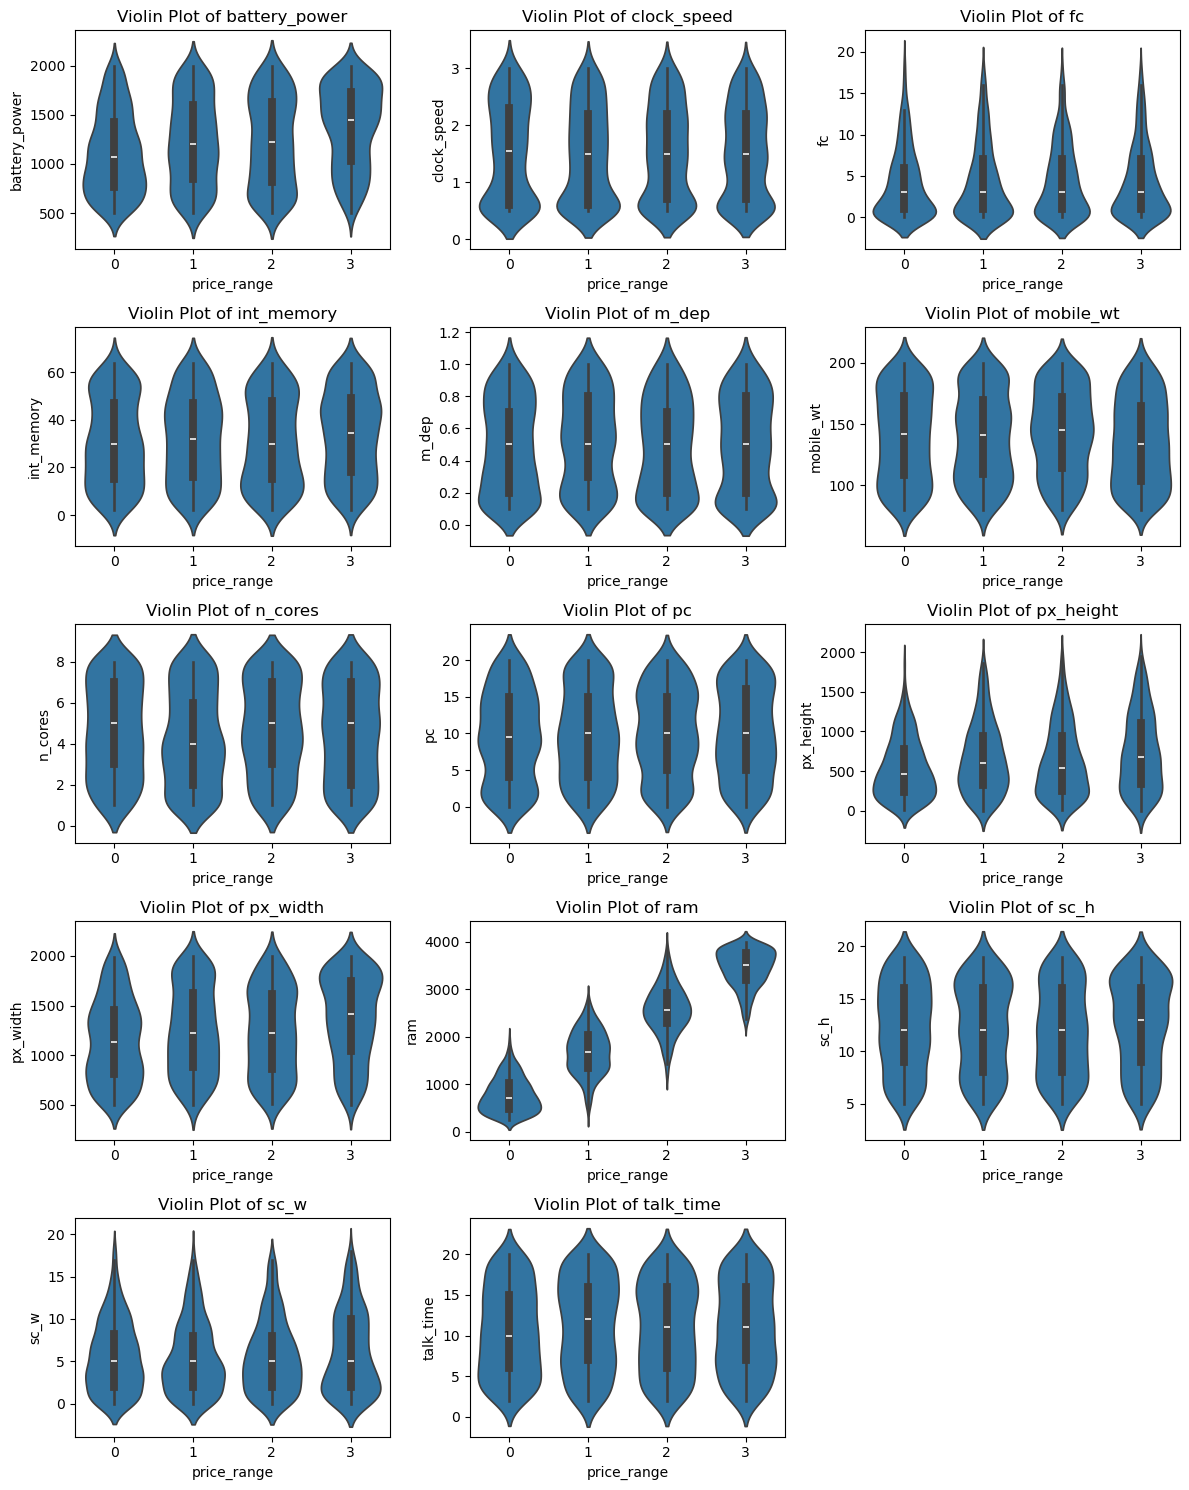

In [31]:
# d. Violin Plot for Numeric Features by price_range
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    sns.violinplot(x='price_range', y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(f'Violin Plot of {feature}')
    axes[i].set_xlabel('price_range')
    axes[i].set_ylabel(feature)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

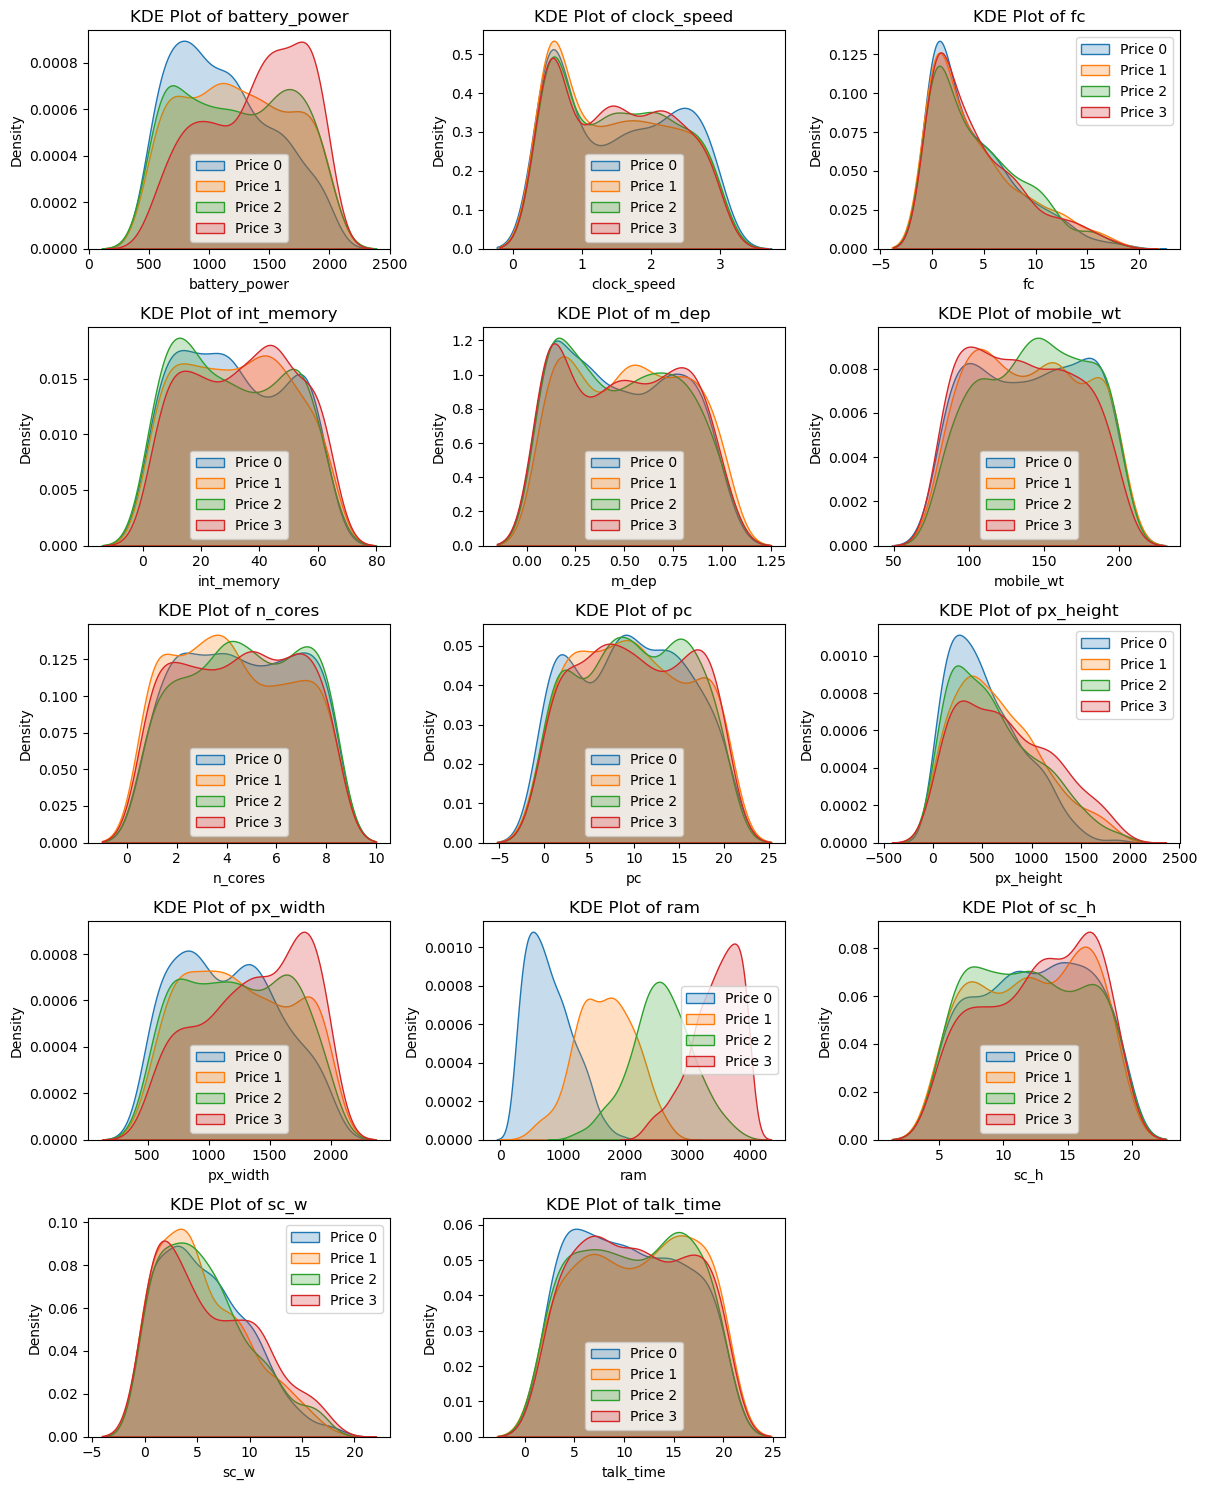

In [35]:
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    for pr in sorted(train_data['price_range'].unique()):
        subset = train_data[train_data['price_range'] == pr]
        sns.kdeplot(subset[feature], label=f'Price {pr}', fill=True, ax=axes[i])  # Changed shade=True to fill=True
    axes[i].set_title(f'KDE Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].legend()

#  Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

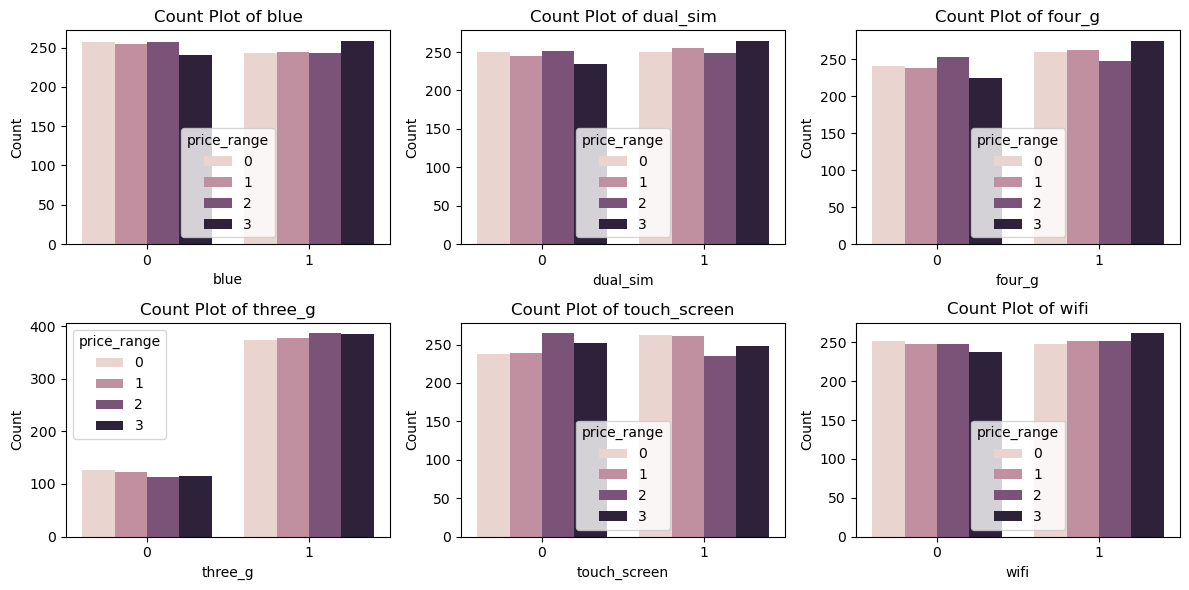

In [37]:
# f. Count Plot for Binary Features by price_range
n_binary = len(binary_features)
ncols_bin = 3
nrows_bin = math.ceil(n_binary / ncols_bin)
fig, axes = plt.subplots(nrows_bin, ncols_bin, figsize=(ncols_bin*4, nrows_bin*3))
axes = axes.flatten()
for i, feature in enumerate(binary_features):
    sns.countplot(x=train_data[feature], hue=train_data['price_range'], ax=axes[i])
    axes[i].set_title(f'Count Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# 4. Data Preparation for Modeling

In [40]:
# Separate features (X) and target (y)
X = train_data.drop(columns=['price_range'])
y = train_data['price_range']

In [42]:
# Split data into training and validation sets (70% - 30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Normalize data (SVM requires scaling; tree-based models are less sensitive)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 5. Modeling and Model Evaluation

In [47]:
# Dictionaries to store metrics and cost (Log Loss) for each model
model_metrics = {}
model_cost = {}

### Model 1: Decision Tree

In [50]:
dt_model = DecisionTreeClassifier(random_state=42)
# Use original data (without scaling) for tree-based models
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_val)
dt_probs = dt_model.predict_proba(X_val)
dt_acc = accuracy_score(y_val, dt_preds)
dt_recall = recall_score(y_val, dt_preds, average='macro')
dt_f1 = f1_score(y_val, dt_preds, average='macro')
dt_cost = log_loss(y_val, dt_probs)

print("=== Decision Tree Classification Report ===")
print(classification_report(y_val, dt_preds))

model_metrics['Decision Tree'] = dt_acc
model_cost['Decision Tree'] = dt_cost

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.74      0.81      0.77       146
           2       0.75      0.74      0.74       148
           3       0.88      0.86      0.87       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



### Model 2: Random Forest

In [53]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)
rf_probs = rf_model.predict_proba(X_val)
rf_acc = accuracy_score(y_val, rf_preds)
rf_recall = recall_score(y_val, rf_preds, average='macro')
rf_f1 = f1_score(y_val, rf_preds, average='macro')
rf_cost = log_loss(y_val, rf_probs)

print("=== Random Forest Classification Report ===")
print(classification_report(y_val, rf_preds))

model_metrics['Random Forest'] = rf_acc
model_cost['Random Forest'] = rf_cost


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.82      0.82      0.82       146
           2       0.79      0.78      0.79       148
           3       0.92      0.91      0.92       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



### Model 3: SVM

In [58]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_val_scaled)
svm_probs = svm_model.predict_proba(X_val_scaled)
svm_acc = accuracy_score(y_val, svm_preds)
svm_recall = recall_score(y_val, svm_preds, average='macro')
svm_f1 = f1_score(y_val, svm_preds, average='macro')
svm_cost = log_loss(y_val, svm_probs)

print("=== SVM Classification Report ===")
print(classification_report(y_val, svm_preds))

model_metrics['SVM'] = svm_acc
model_cost['SVM'] = svm_cost

=== SVM Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.78      0.84      0.81       146
           2       0.85      0.82      0.84       148
           3       0.95      0.92      0.93       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



# 6. Compare Models

In [61]:
print("=== Model Metrics ===")
for model in model_metrics:
    print(f"{model} -> Accuracy: {model_metrics[model]:.4f}, Log Loss: {model_cost[model]:.4f}")

=== Model Metrics ===
Decision Tree -> Accuracy: 0.8183, Log Loss: 6.5479
Random Forest -> Accuracy: 0.8667, Log Loss: 0.5723
SVM -> Accuracy: 0.8700, Log Loss: 0.2875


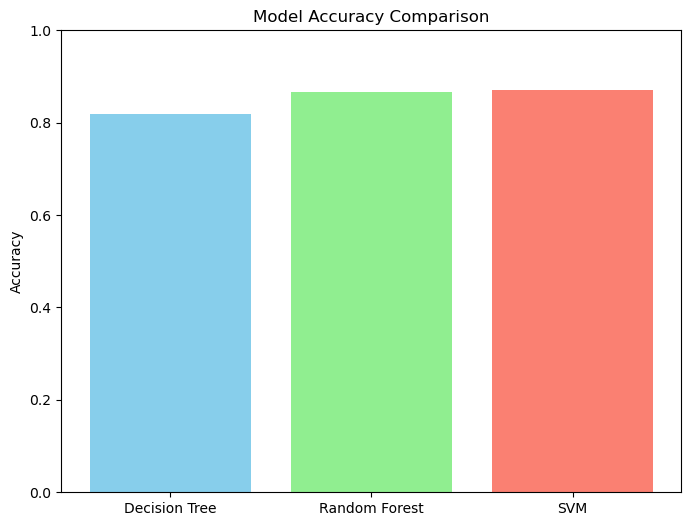

In [63]:
# Bar plot to compare model accuracies
plt.figure(figsize=(8,6))
plt.bar(model_metrics.keys(), model_metrics.values(), color=['skyblue','lightgreen','salmon'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

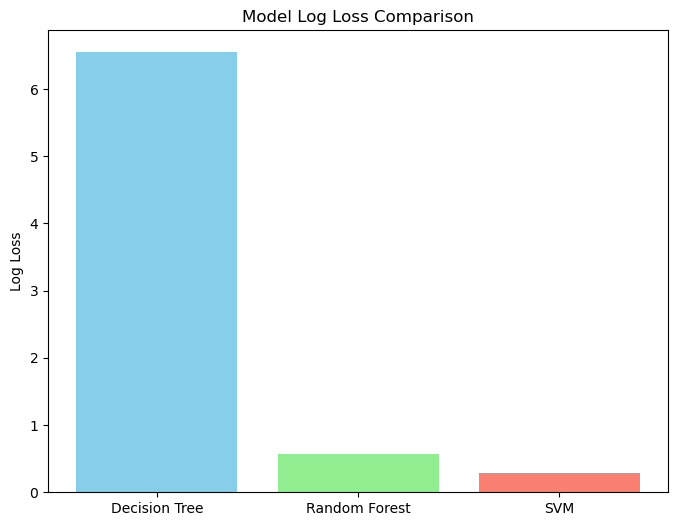

In [65]:
# Bar plot to compare model Log Loss
plt.figure(figsize=(8,6))
plt.bar(model_cost.keys(), model_cost.values(), color=['skyblue','lightgreen','salmon'])
plt.title("Model Log Loss Comparison")
plt.ylabel("Log Loss")
plt.show()

# 7. Prediction on Test Dataset

In [68]:
#  test dataset  without the price_range column.
mobile_test = pd.read_csv('test.csv')
print(mobile_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [70]:
# Select the best model based on highest accuracy
best_model_name = max(model_metrics, key=model_metrics.get)
print(f"Best model based on accuracy: {best_model_name}")

Best model based on accuracy: SVM


In [78]:
mobile_test2 = mobile_test.drop("id", axis=1)

In [82]:
# Predict using the selected best model:
if best_model_name == 'SVM':
    # For SVM, use scaled data
    X_test = scaler.transform(mobile_test2)
    final_preds = svm_model.predict(X_test)
elif best_model_name == 'Decision Tree':
    X_test = mobile_test2  # Use original data for tree-based models
    final_preds = dt_model.predict(X_test)
elif best_model_name == 'Random Forest':
    X_test = mobile_test2
    final_preds = rf_model.predict(X_test)

print("Predicted price_range for test dataset (sample of 20 rows):")
print(final_preds[:1000])

Predicted price_range for test dataset (sample of 20 rows):
[2 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 1 1 3 1 1 3 0 2 0 2 0 2 0 3 0 1 1 3
 2 2 1 1 2 0 0 0 1 0 3 1 2 1 0 2 0 3 1 3 1 0 3 3 2 0 1 1 1 2 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 2 1 3 0 1 1 2 1 2 1 0 2 1 3 1 0 0 3 1 2 1 1 2 3 3
 2 1 3 3 3 3 2 3 1 0 3 2 1 2 1 3 2 3 1 0 2 1 1 3 1 1 0 3 2 1 2 1 2 2 3 3 3
 2 3 2 3 0 0 3 2 3 3 2 3 3 2 3 3 3 3 1 0 3 0 0 0 1 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 1 3 1 0 2 2 2 2 1 2 3 3 2 2 1 1 0 0 1 3 0 3 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 2 1 2 0 3 1 2 0 0 2 1 2 2 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 0 3 0 1 2 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 3 3 1 0 0 3 0 3 1 1 2 0 2 2 1 3 2 2 1 2 0 0 0 1 3 2 0 1 0 3 1 0 3 3 1
 2 3 2 3 1 3 3 2 2 2 2 3 1 3 0 3 1 3 1 2 3 0 2 1 3 1 3 2 3 0 0 1 1 1 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 1 3 0 3 0 3 0 1 1 0 1 0 3 2 3 3 1 3 1 2 1 2 2 0 1 2 1 2 0 0
 0 1 2 1 0 3 1 0 2 3 0 0 3 1 1 1 2 2 3 0

In [84]:
# Create a DataFrame with the predictions
df_predictions = pd.DataFrame({
    'ID': range(1, len(final_preds) + 1),
    'Predicted_Price_Range': final_preds
})

# Map numeric predictions to descriptive categories
price_range_map = {0: 'Low Cost', 1: 'Medium Cost', 2: 'High Cost', 3: 'Very High Cost'}
df_predictions['Price_Category'] = df_predictions['Predicted_Price_Range'].map(price_range_map)

# Display the first 20 rows of the DataFrame
print(f"Predicted price_range for test dataset using {best_model_name} (first 20 rows):")
print(df_predictions.head(20).to_string(index=False))

# Optional: Save the predictions to a CSV file
df_predictions.to_csv('mobile_price_predictions.csv', index=False)
print("\nFull predictions saved to 'mobile_price_predictions.csv'")

Predicted price_range for test dataset using SVM (first 20 rows):
 ID  Predicted_Price_Range Price_Category
  1                      2      High Cost
  2                      3 Very High Cost
  3                      2      High Cost
  4                      3 Very High Cost
  5                      1    Medium Cost
  6                      3 Very High Cost
  7                      3 Very High Cost
  8                      1    Medium Cost
  9                      3 Very High Cost
 10                      0       Low Cost
 11                      3 Very High Cost
 12                      3 Very High Cost
 13                      0       Low Cost
 14                      0       Low Cost
 15                      2      High Cost
 16                      0       Low Cost
 17                      2      High Cost
 18                      1    Medium Cost
 19                      3 Very High Cost
 20                      1    Medium Cost

Full predictions saved to 'mobile_price_predictions